# INTRODUCTION 

**Nisa Aprilia M.**

**FTDS #004**

# IMPORT LIBRARIES 

In [226]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# IMPORT DATA 

In [227]:
# import dataset from csv file 
df = pd.read_csv(r"C:\Users\nisam\Downloads\data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Quick Exploration:**

In [228]:
# check total rows & colums of the dataset 
df.shape

(1470, 35)

In [229]:
# check concise summary of a the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [230]:
# check unique values of our target 
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

**LABEL ENCODING UNTUK TARGET**

In [231]:
# change our target data to interger using LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df.Attrition.values)
df.Attrition.unique()

array([1, 0])

In [232]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# EXPLORATORY DATA ANALYSIS 

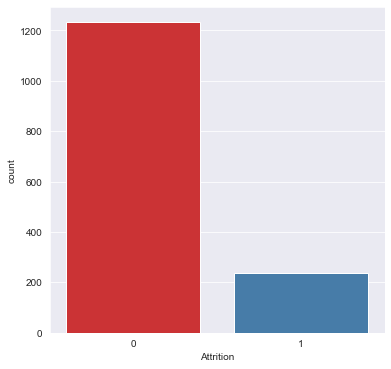

In [233]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="Attrition", data=df, palette="Set1")
plt.show()

***Kesimpulan: Nilai target yang dimiliki oleh dataset adalah imbalance.***

**Menjawab soal: 2) Berapa % Attrition pada dataset tersebut?**

In [234]:
# cek value counts 
att = df.Attrition.value_counts()
att

0    1233
1     237
Name: Attrition, dtype: int64

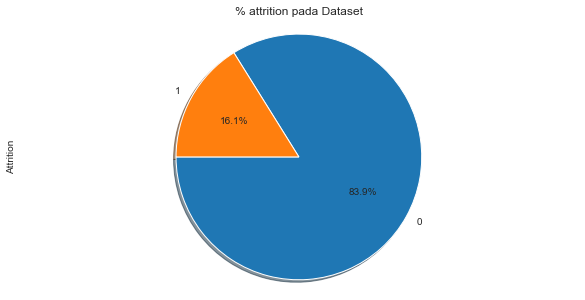

In [235]:
# visualisasi dengan pie chart 
att.plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%', startangle=180, shadow=True, y=1)
plt.axis('equal') 
plt.title('% attrition pada Dataset') 
plt.show()

***Jawaban: 84% karyawan tidak mengalami Attrition, dan 16% karyawan mengalami Attrition.***

**Menjawab soal: 3) Umur berapa yang memiliki attration tertinggi?**

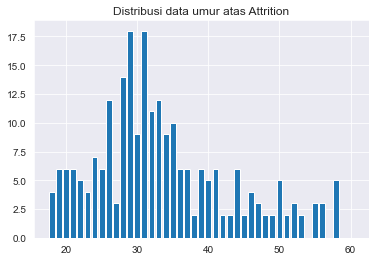

In [236]:
age=df.groupby(df['Age']).sum()
age=age.reset_index()
age=plt.bar(age['Age'],age['Attrition'])
plt.title('Distribusi data umur atas Attrition')
plt.show()

***Jawaban: Attrition tertinggi adalah pada karyawan berumur 29 dan 31 tahun.***

**Menjawab soal: 4) Apakah performance dan job satisfaction mempengaruhi attrition?**

Employee Performance Rating Summary 
Attrition             0    1
PerformanceRating           
3                  1044  200
4                   189   37


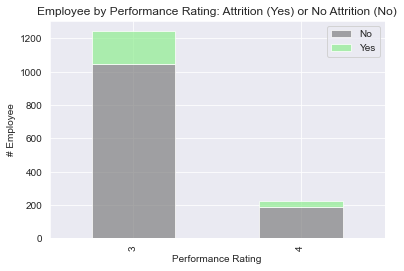

In [237]:
# Employee Performance Rating Summary 
print('Employee Performance Rating Summary ')

#print('\n')
print(df.groupby(['PerformanceRating','Attrition']).PerformanceRating.count().unstack())

# Passenger class visualization
pr = df.groupby(['PerformanceRating','Attrition']).PerformanceRating.count().unstack()
p1 = pr.plot(kind = 'bar', stacked = True, 
                   title = 'Employee by Performance Rating: Attrition (Yes) or No Attrition (No)', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Performance Rating')
p1.set_ylabel('# Employee')
p1.legend(['No','Yes'])
plt.show()

***Jawaban: dapat dikatakan bahwa performance rating mempengaruhi attrition, karena bisa dilihat pada employee yang mendapatkan performance rating 3, lebih banyak menerima/melakukan attrition/pemberhentian kerja.***

Employee Job Satisfaction Summary 
Attrition          0   1
JobSatisfaction         
1                223  66
2                234  46
3                369  73
4                407  52


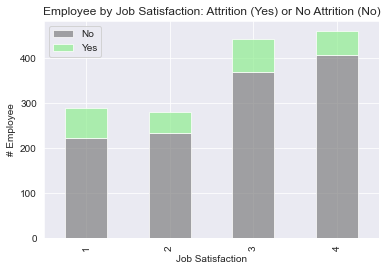

In [238]:
# Employee Job Satisfaction Summary 
print('Employee Job Satisfaction Summary ')

#print('\n')
print(df.groupby(['JobSatisfaction','Attrition']).PerformanceRating.count().unstack())

# Passenger class visualization
pr = df.groupby(['JobSatisfaction','Attrition']).PerformanceRating.count().unstack()
p1 = pr.plot(kind = 'bar', stacked = True, 
                   title = 'Employee by Job Satisfaction: Attrition (Yes) or No Attrition (No)', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Job Satisfaction')
p1.set_ylabel('# Employee')
p1.legend(['No','Yes'])
plt.show()

***Jawaban: dapat dikatakan bahwa Job Satisfaction tidak terlalu mempengaruhi attrition, karena bisa dilihat pada employee dengan rating 3, lebih banyak menerima/melakukan attrition/pemberhentian kerja daripada employee dengan rating 2. Begitu juga dengan employee dengan rating 4, perbandingan antara yes/no nya tidak se-signifikan employee dengan rating 3.***

**Menjawab soal: 5) Apakah yang memiliki income yang rendah, lebih cenderung Attrition?**

In [239]:
df.MonthlyIncome.unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

Text(0.5, 1.0, 'Employee Monthly Income')

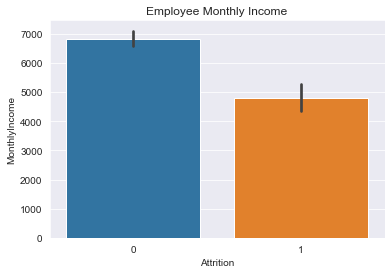

In [240]:
# Suplots of employee monthly income v attrition
sns.set_style('darkgrid')

# Plot [0]
cp=sns.barplot(x = df.Attrition, y = df.MonthlyIncome)
cp.set_xlabel('Attrition')
cp.set_ylabel('MonthlyIncome')
cp.set_title('Employee Monthly Income')

***Jawaban: Iya, besarnya monthly income mempengaruhi attrition karyawan, bisa dilihat dari nilai grafik hasil warna oranye, dimana employee yang berhenti bekerja adalah employee yang monthly income nya di bawah 5000.***

**Menjawab soal: 6) Apakah work life balance mempengaruhi tingkat attrition?**

Employee Work Life Balance Summary 
Attrition          0    1
WorkLifeBalance          
1                 55   25
2                286   58
3                766  127
4                126   27


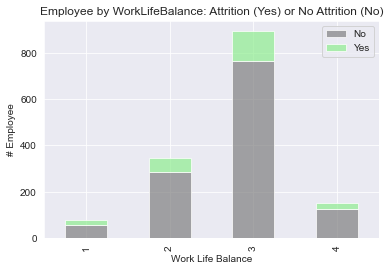

In [241]:
# Employee Work Life Balance Summary 
print('Employee Work Life Balance Summary ')

#print('\n')
print(df.groupby(['WorkLifeBalance','Attrition']).PerformanceRating.count().unstack())

# Passenger class visualization
pr = df.groupby(['WorkLifeBalance','Attrition']).PerformanceRating.count().unstack()
p1 = pr.plot(kind = 'bar', stacked = True, 
                   title = 'Employee by WorkLifeBalance: Attrition (Yes) or No Attrition (No)', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Work Life Balance')
p1.set_ylabel('# Employee')
p1.legend(['No','Yes'])
plt.show()

***Jawaban: dapat disimpulkan bahwa dengan keterbatasan sample yang tersedia, WorkLifeBalance tidak terlalu mempengaruhi attrition, karena bisa dilihat pada employee yang memberikan rating 4, presentase antara ya/tidak nya attrition tidak terlalu jauh, namun pada employee yang memberikan rating 3, perbandingan antara keduanya lebih besar satu sama lain.***

# GETTING DATASET READY 

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Sebagai seorang karyawan pada suatu perusahaan, dimungkinkan faktor-faktor yang menjadi pertimbangan untuk umur, attrition adalah kepuasan lingkungan kerja, posisi, gaji, seberapa baik/aktif pelatihan yang diadakan oleh kantor dalam menjaga performa dan kepuasan hasil kerja, rating performance dari atasan, keseimbangan antara pekerjaan dan kehidupan pribadi, serta promosi/jenjang karir. Maka hal-hal ini yang kemungkinan akan dijadikan feature dan dicari korelasinya terlebih dahulu.**

In [243]:
df = df[['Age', 'Attrition', 'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike',
        'PerformanceRating', 'YearsSinceLastPromotion']]

# rename column 'Attrition'
df = df.rename(columns={'Attrition': 'Target'})
df.head()

,Age,Target,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,YearsSinceLastPromotion
0,41,1,2,2,4,5993,11,3,0
1,49,0,3,2,2,5130,23,4,1
2,37,1,4,1,3,2090,15,3,0
3,33,0,4,1,3,2909,11,3,3
4,27,0,1,1,2,3468,12,3,2


**FEATURES CORRELATION:**

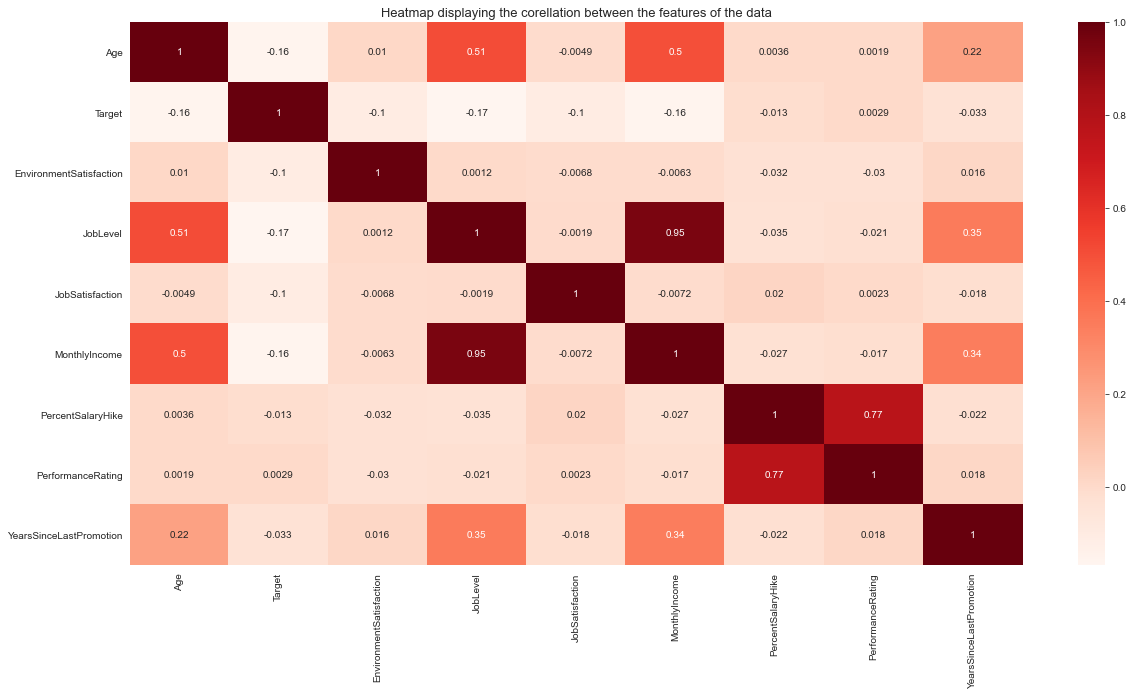

In [244]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the corellation between the features of the data',
         fontsize=13)
plt.show()

# DATA PREPROCESSING 

**PEMISAHAN DATA & TARGET:**

In [245]:
# memisahkan data dengan target 
X = df.drop(['Target'], axis=1)
y = df['Target']
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (1470, 8)
y Shape: (1470,)


**DATA SCALING:**

In [246]:
scaler = StandardScaler() 
scaler.fit(X) 
X = scaler.transform(X) 

**TRAIN & TEST SPLITTING:**

**Perbandingan 80% - 20% untuk data train dan dataset.**

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1176, 8)
(294, 8)


# DATA TRAINING AND MODEL EVALUATION

# 1) Decision Tree

**Model Definition**

In [248]:
DT = DecisionTreeClassifier(random_state=42)

**Model Training**

In [249]:
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

**Model Evaluation**

print("DT Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("DT Precision:", metrics.precision_score(y_test, y_pred))
print("Dt Recall:", metrics.recall_score(y_test, y_pred))

***Kesimpulan: akurasi dari model desition tree masih kurang, yaitu 76%, kita akan melakukan hyperparameter tuning untuk meningkatkan akurasi model kita.***

**Hyperparameter Tuning**

In [250]:
# setting parameters 
DT = DT
parameters = {
    "max_depth": [5, 8],
    "max_features": ["log2","sqrt"]
}

In [251]:
# Use the GridSearchCV model selection for cross-validation
cv = GridSearchCV(DT,parameters,scoring="accuracy",cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 8], 'max_features': ['log2', 'sqrt']},
             scoring='accuracy')

In [252]:
# print the best hyperparameters
print('Best Parameter:', cv.best_params_)
print('Best Estimator:', cv.best_estimator_)

Best Parameter: {'max_depth': 5, 'max_features': 'sqrt'}
Best Estimator: DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=42)


**Applying Best Estimator to Our Model**

In [253]:
# model definition
DT = cv.best_estimator_

In [254]:
# model training 
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

**Model Evaluation After Tuning**

In [255]:
print("DT Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("DT Precision:", metrics.precision_score(y_test, y_pred))
print("Dt Recall:", metrics.recall_score(y_test, y_pred))

DT Accuracy: 0.8605442176870748
DT Precision: 0.375
Dt Recall: 0.07692307692307693


***Hasil: Dengan hyperparameter tuning, model kita berhasil meningkatkan akurasi dari sebelumnya 76% menjadi 86%.***

# 2) Random Forest 

**Model Definition**

In [256]:
RF = RandomForestClassifier(random_state=42)

**Model Training**

In [257]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

**Model Evaluation**

In [258]:
print("RF Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("RF Precision:", metrics.precision_score(y_test, y_pred))
print("RF Recall:", metrics.recall_score(y_test, y_pred))

RF Accuracy: 0.8469387755102041
RF Precision: 0.25
RF Recall: 0.07692307692307693


***Kesimpulan: menggunakan algorithm Random Forest, hasil awal tanpa parameter sudah cukup bagus, namun tetap kita akan melakukan hyperparameter tuning agar model bisa lebih baik lagi dari segi skor akurasi.***

**Hyperparameter Tuning**

In [259]:
# setting parameters 
RF = RF
parameters = {
    "n_estimators":[100,250],
    "max_depth":[8,16]
    
}

In [260]:
# Use the GridSearchCV model selection for cross-validation
cv = GridSearchCV(RF,parameters,scoring="accuracy",cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8, 16], 'n_estimators': [100, 250]},
             scoring='accuracy')

In [261]:
# print the best hyperparameters
print('Best Parameter:', cv.best_params_)
print('Best Estimator:', cv.best_estimator_)

Best Parameter: {'max_depth': 8, 'n_estimators': 250}
Best Estimator: RandomForestClassifier(max_depth=8, n_estimators=250, random_state=42)


**Applying Best Estimator to Our Model**

In [262]:
# model definition
RF = cv.best_estimator_

In [263]:
# model training 
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

**Model Evaluation After Tuning**

In [264]:
print("RF Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("RF Precision:", metrics.precision_score(y_test, y_pred))
print("RF Recall:", metrics.recall_score(y_test, y_pred))

RF Accuracy: 0.8639455782312925
RF Precision: 0.42857142857142855
RF Recall: 0.07692307692307693


# KESIMPULAN ATAS PERBANDINGAN KEDUA MODEL SETELAH TUNING:

**1) Desicion Tree:**

DT Accuracy: 0.8639455782312925

DT Precision: 0.42857142857142855

Dt Recall: 0.07692307692307693

**2) Random Forest:**

RF Accuracy: 0.8639455782312925

RF Precision: 0.42857142857142855

RF Recall: 0.07692307692307693

**Menjawab pertanyaan: 1) Bandingkan antara model Decision Tree dan Random Forest. Mana yang lebih baik untuk data ini?**

***Kebetulan hasil scoring accuracy, precision, dan recall dari kedua model tersebut adalah sama persis. Sehingga, kita bebas untuk memilih model yang terbaik untuk kasus ini. Namun, saya pribadi akan lebih memilih Random Forest, karena sebelum hypertuning, hasilnya juga sudah cukup bagus.***

**Model Inference menggunakan Random Forest**

In [265]:
df.head()

,Age,Target,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,YearsSinceLastPromotion
0,41,1,2,2,4,5993,11,3,0
1,49,0,3,2,2,5130,23,4,1
2,37,1,4,1,3,2090,15,3,0
3,33,0,4,1,3,2909,11,3,3
4,27,0,1,1,2,3468,12,3,2


In [266]:
# new data 1 
new_data =[30,4,1,4,3500,20,3,2]
new_pred = RF.predict([new_data])

if new_pred == [0]:
  print("Prediksi attrition karyawan dengan data baru: Tidak")
else :
  print("Prediksi attrition karyawan dengan data baru: Iya")

Prediksi attrition karyawan dengan data baru: Tidak


***Hasil Prediksi: karyawan berumur 30 th, dgn skor kepuasan lingkungan: 4, level pekerjaan: 1, kepuasan pekerjaan: 4, income perbulan sebesar: 3500, kenaikan presentasi gaji sebesar 20%, rating performance pada tingkat 3, dan terakhir menerima promosi jabatan adalah 2 tahun lalu, diperkirakan tidak akan menerima/melakukan attrition (berhenti kerja dengan alasan apapun).***

# MODEL ANALYSIS AND MODEL EVALUATION

1) Dibandingkan dengan algorithm Decision Tree, Random Forest tanpa parameter sudah menunjukkan hasil akurasi yang cukup bagus, dan hanya naik 1% atas akurasinya setelah dilakukan hyperparameter tuning dengan GridSearchCV. sedangkan Desicion Tree tanpa parameter belum menunjukkan hasil akurasi yang cukup bagus, tetapi skor akurasinya naik cukup tinggi yaitu sebesar 10% setelah dilakukan hyperparameter tuning.

2) Huperparameter tuning sangat membantu dalam meningkatkan skor akurasi, presisi, dan recall atas sebuah algoritma.

3) Hasil kedua akurasi model adalah sama persis, yaitu akurasi sebesar 86%, presisi sebesar 42%, dan recall sebesar 0.07%.

**Berikut adalah evaluasi hasil model RandomForest dengan confusion matrix:**

In [267]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cnf_matrix.ravel()
print('True Negative  : ', tn)
print('False Positive : ', fp)
print('False Negative : ', fn)
print('True Positive  : ', tp)

True Negative  :  251
False Positive :  4
False Negative :  36
True Positive  :  3


<AxesSubplot:>

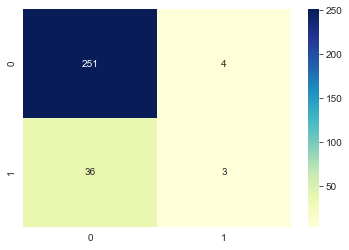

In [268]:
# visualize confusion matrix with seaborn heatmap
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='YlGnBu')

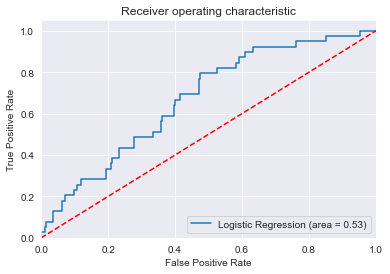

In [269]:
# visualize ROC score curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, RF.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

***Kesimpulan: karena nilai Logistic Regression nya adalah 0,5, bisa dikatakan kurang bagus, karena belum mendekati 1. Disarankan untuk melakukan analisa lebih dalam lagi mengenai fitur lain yang mungkin bisa dipakai untuk membuat suatu model dengan nilai Logistik Regression yang bagus.***